In [1]:
from tyxe_runfiles import train, generate
import tyxe_runfiles.eval as eval1

from modules.config import read_config
import modules.plots as plots
import torch
import numpy as np
import os

/Home/siv31/tak011/.conda/envs/master/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BASE_DIR = "./tests/pipeline-test"
PROFILE = "sin-10x-mcmc"

In [3]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

In [4]:
config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]

config["DEVICE"] = "cuda:5"

In [5]:
GENERATE = True
TRAIN = True
EVAL = True

IS_ONE_DIM = False

====== Generating profile sin-10x-10k ======


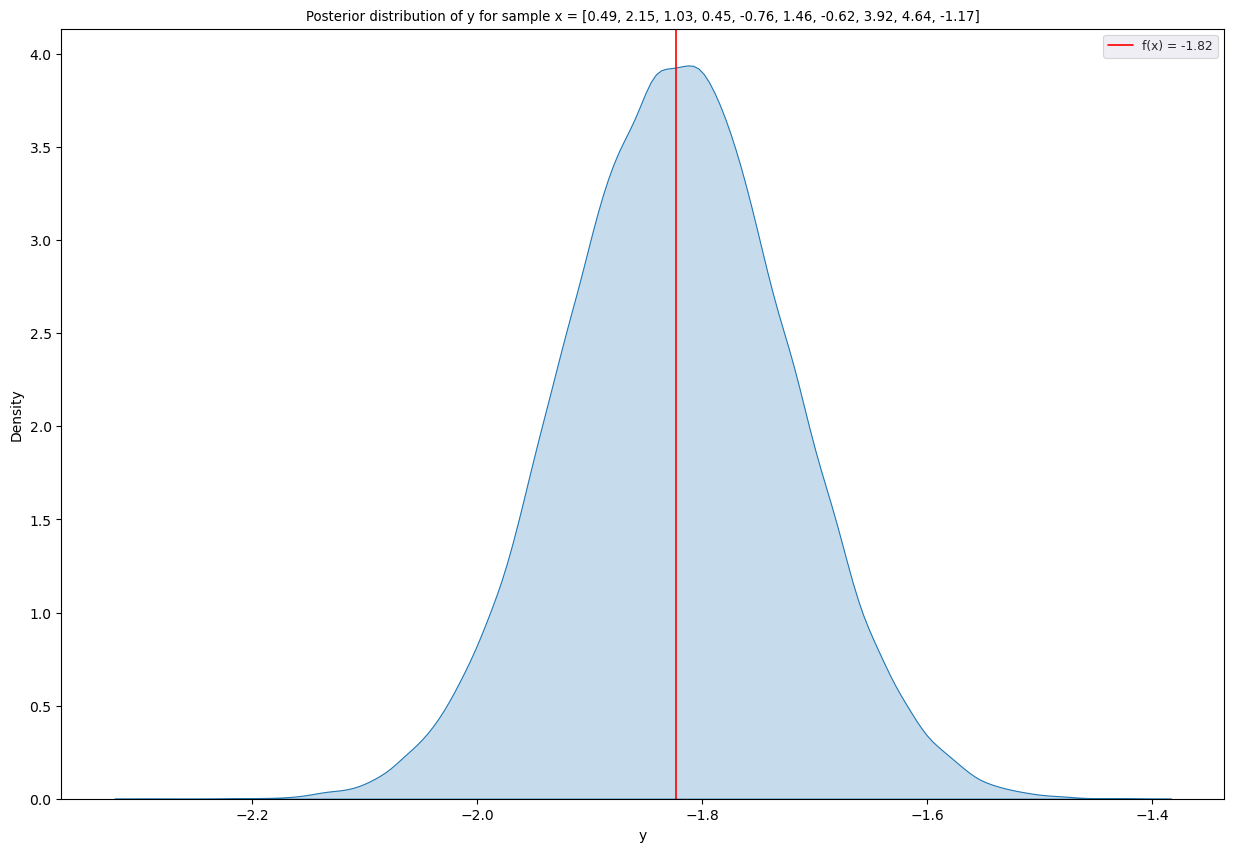

In [6]:
if GENERATE:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [7]:
if TRAIN:
    if not os.path.exists(f"{BASE_DIR}/models"):
        os.mkdir(f"{BASE_DIR}/models")

    bnn, train_stats = train.train(config, dataset_config, f"{BASE_DIR}")

test-shape:  (1000, 11)
torch.Size([1000, 10]) torch.Size([1000, 1])
torch.Size([512, 10]) torch.Size([512, 1])
Sequential(
  (0): Linear(in_features=10, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1, bias=True)
)
Using device: cuda:5
===== Training profile sin-10x-mcmc =====


Sample: 100%|██████████████████████| 600/600 [35:54,  3.59s/it, step size=5.45e-09, acc. prob=0.822]

Training finished in 0:35:55.099737 seconds


test-shape:  (1000, 11)
torch.Size([1000, 10]) torch.Size([1000, 1])
using device: cuda:5
====== evaluating profile sin-10x-mcmc ======
data samples:  (1000, 100)


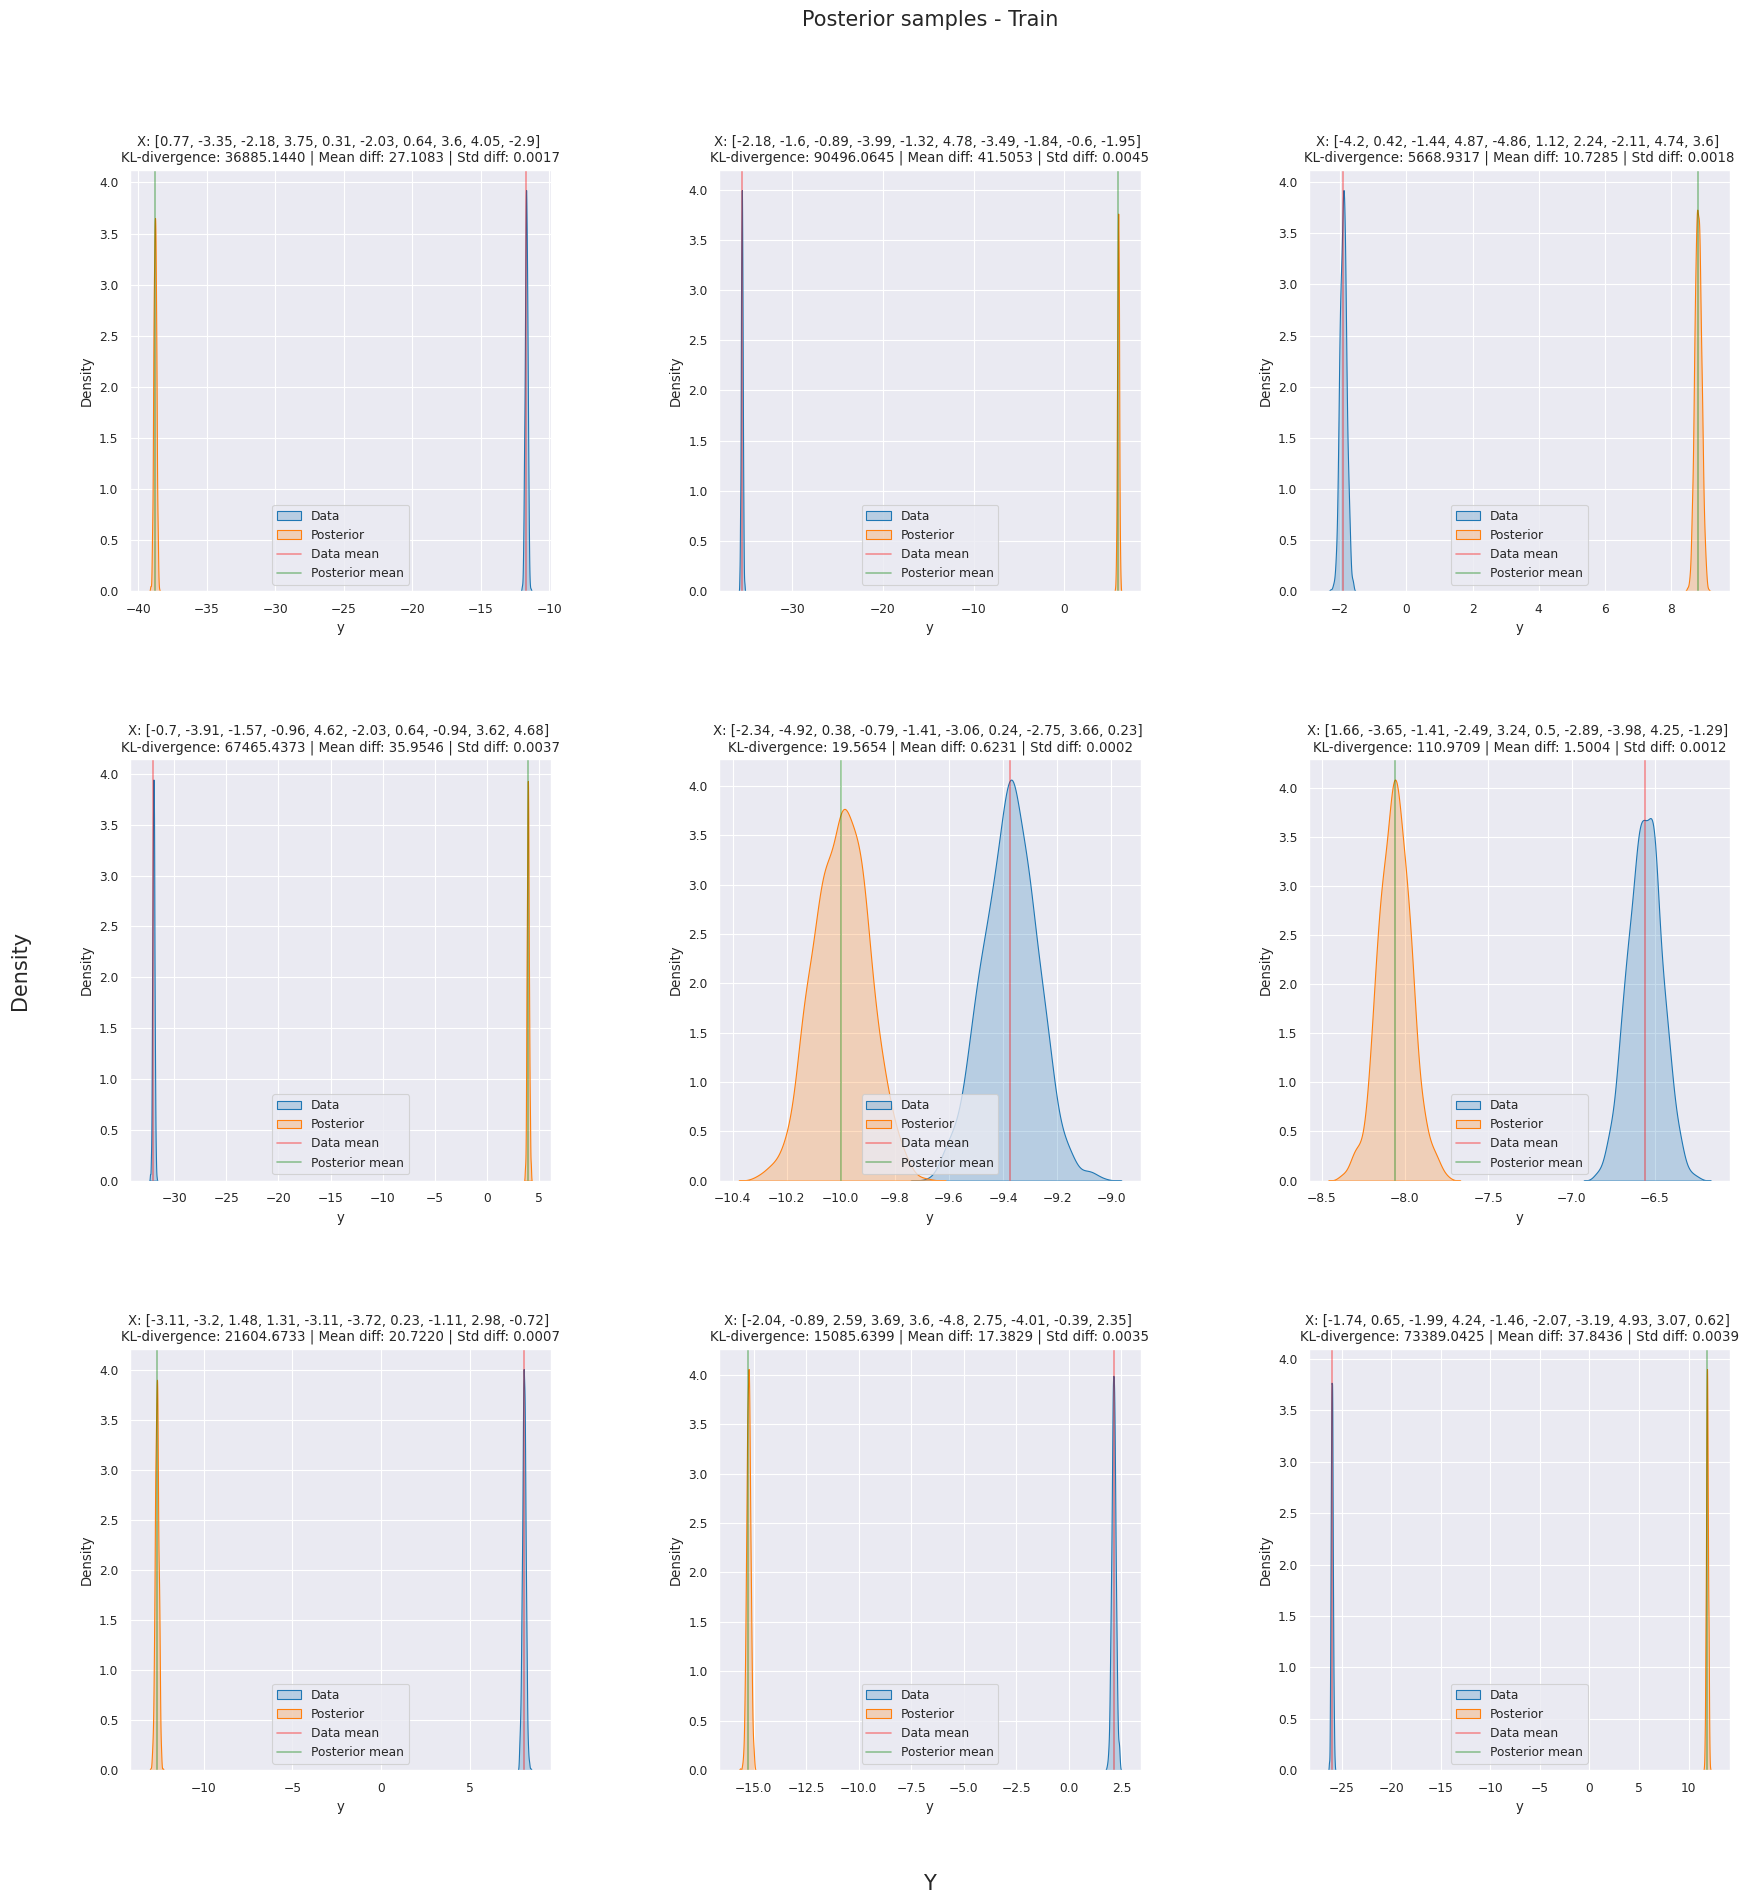

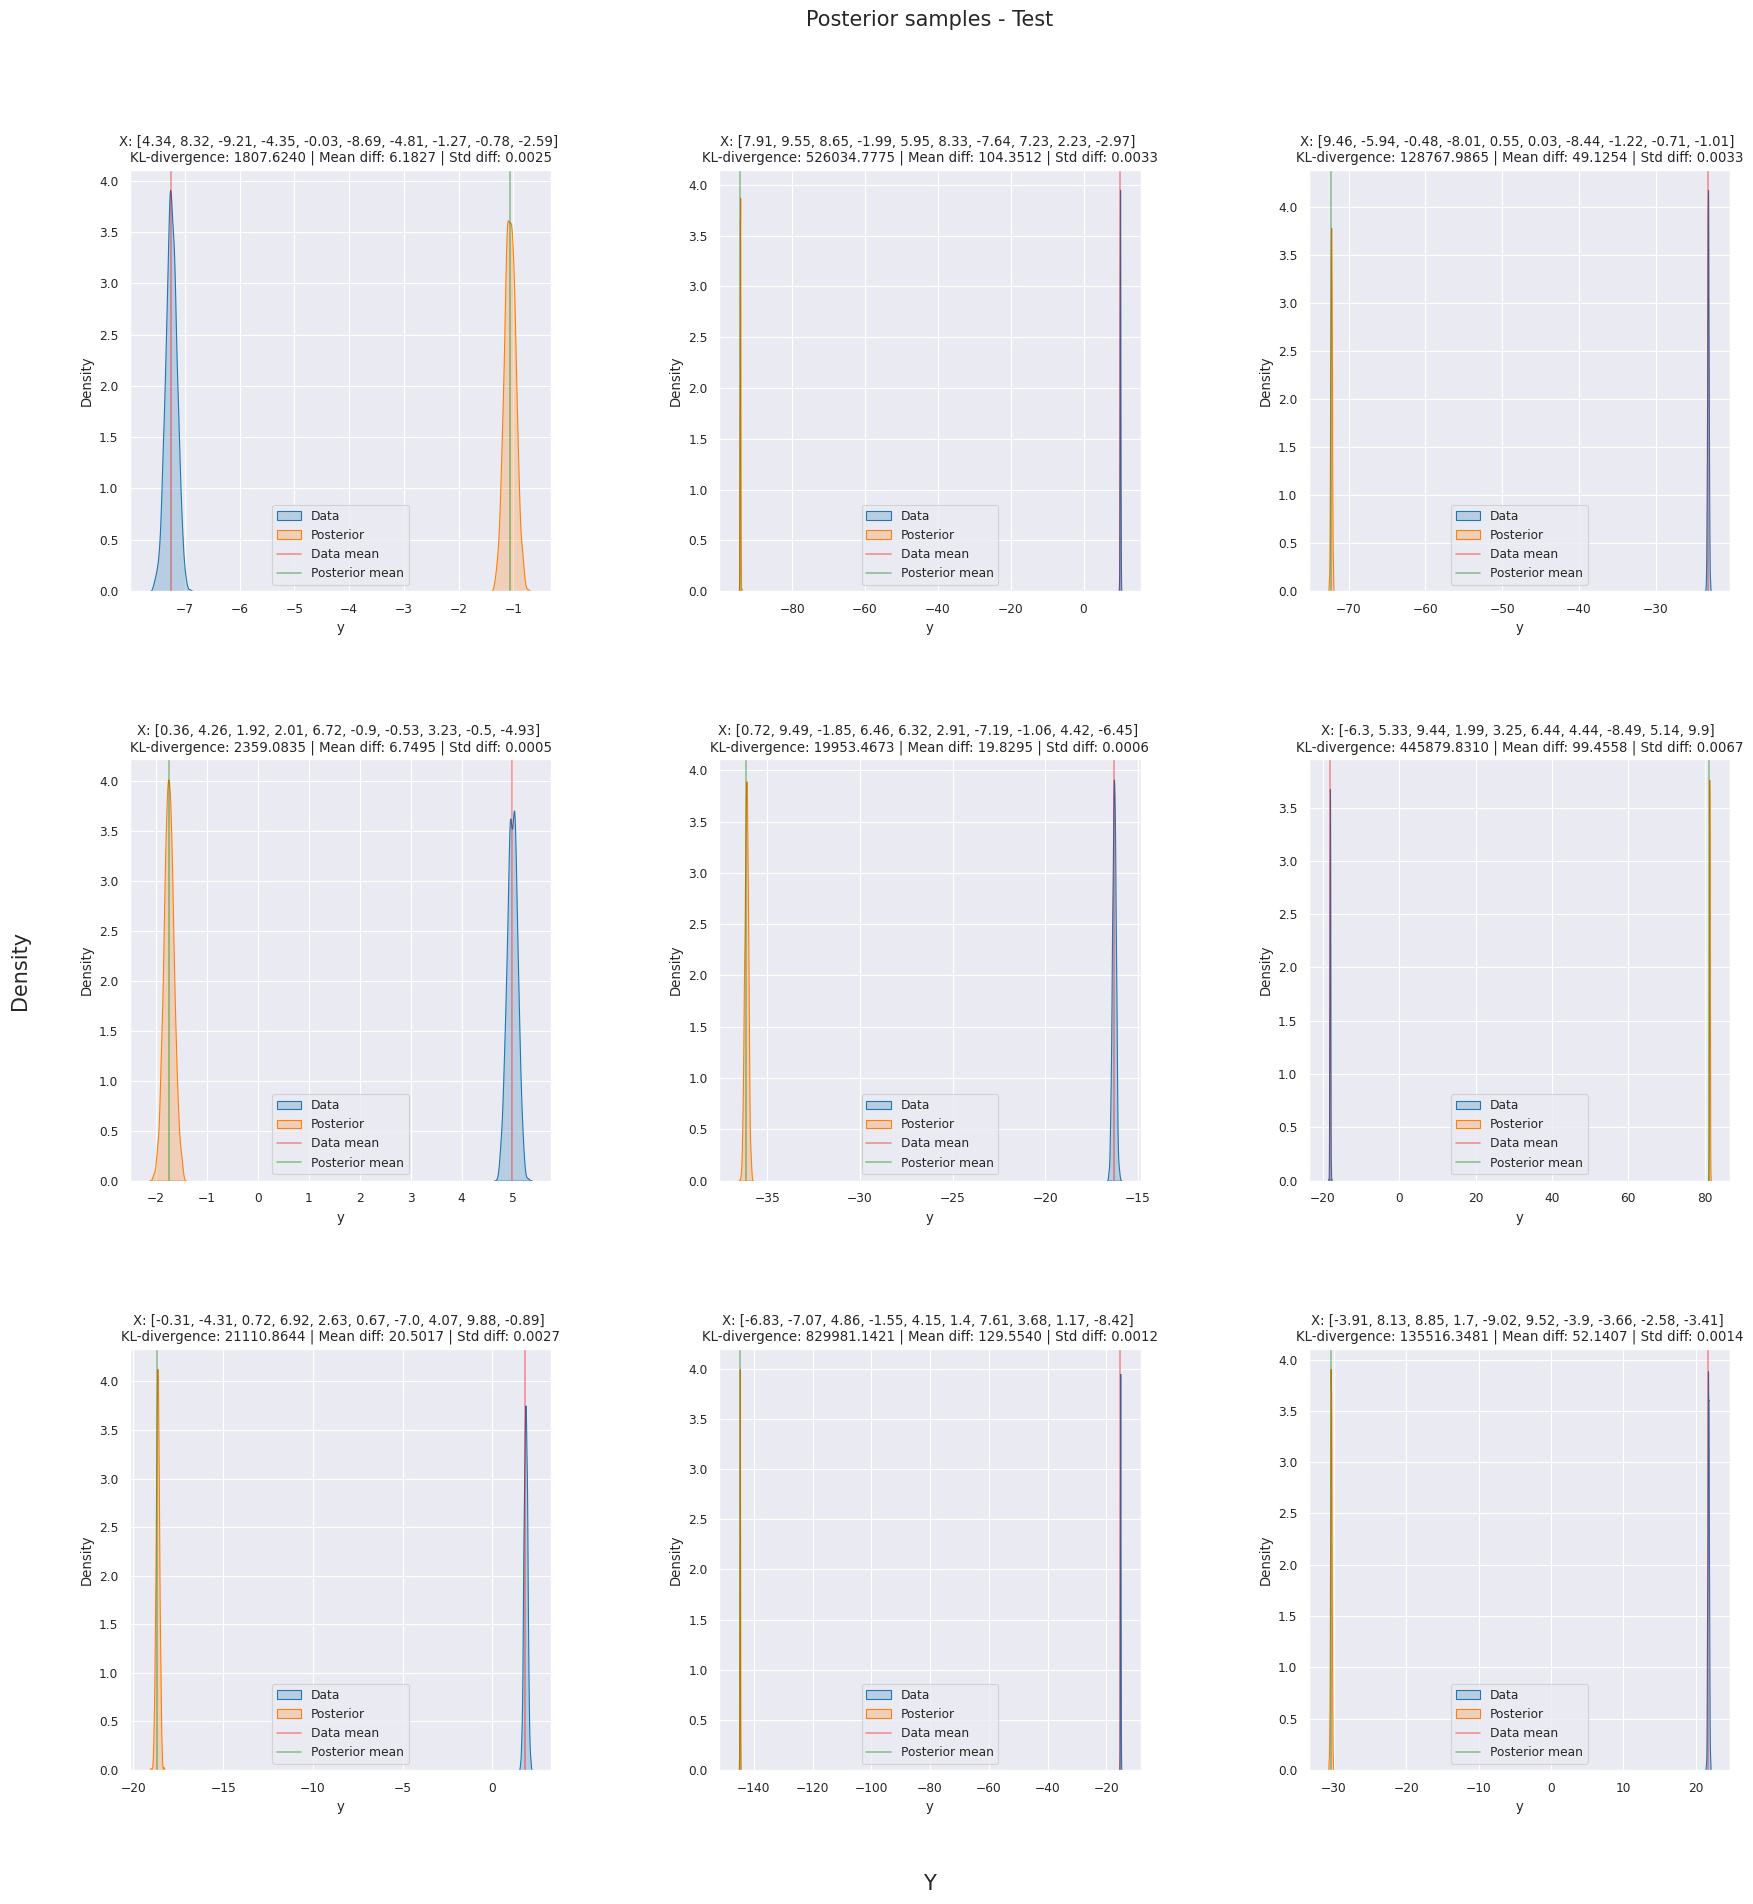

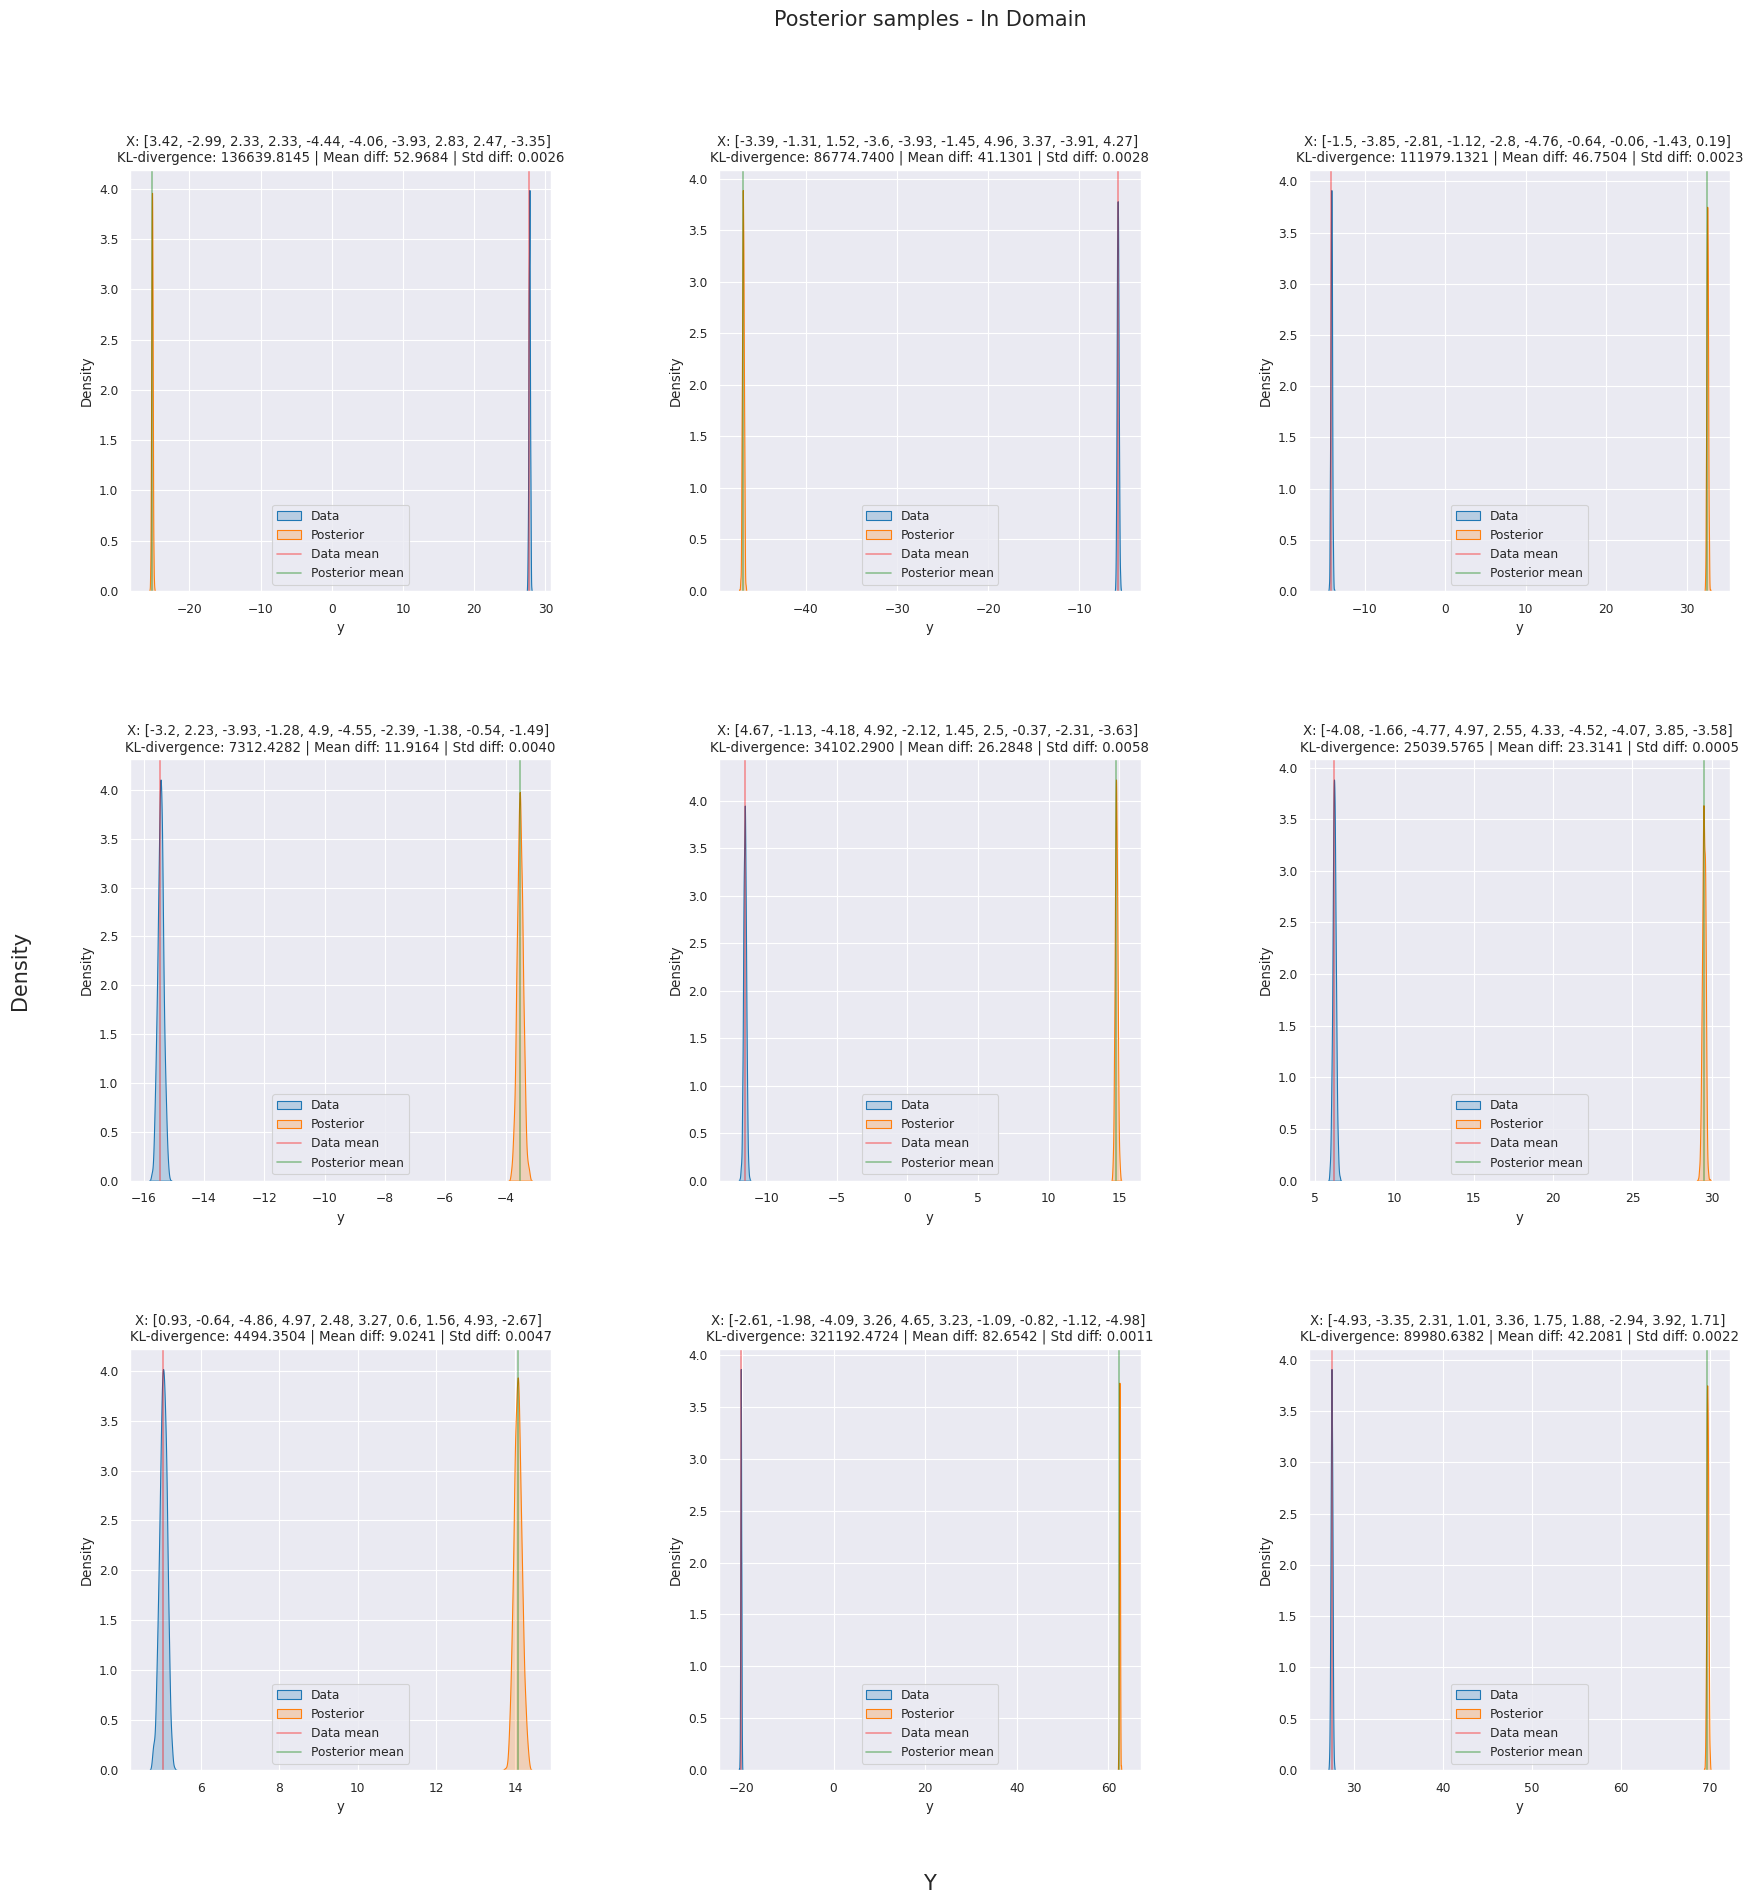

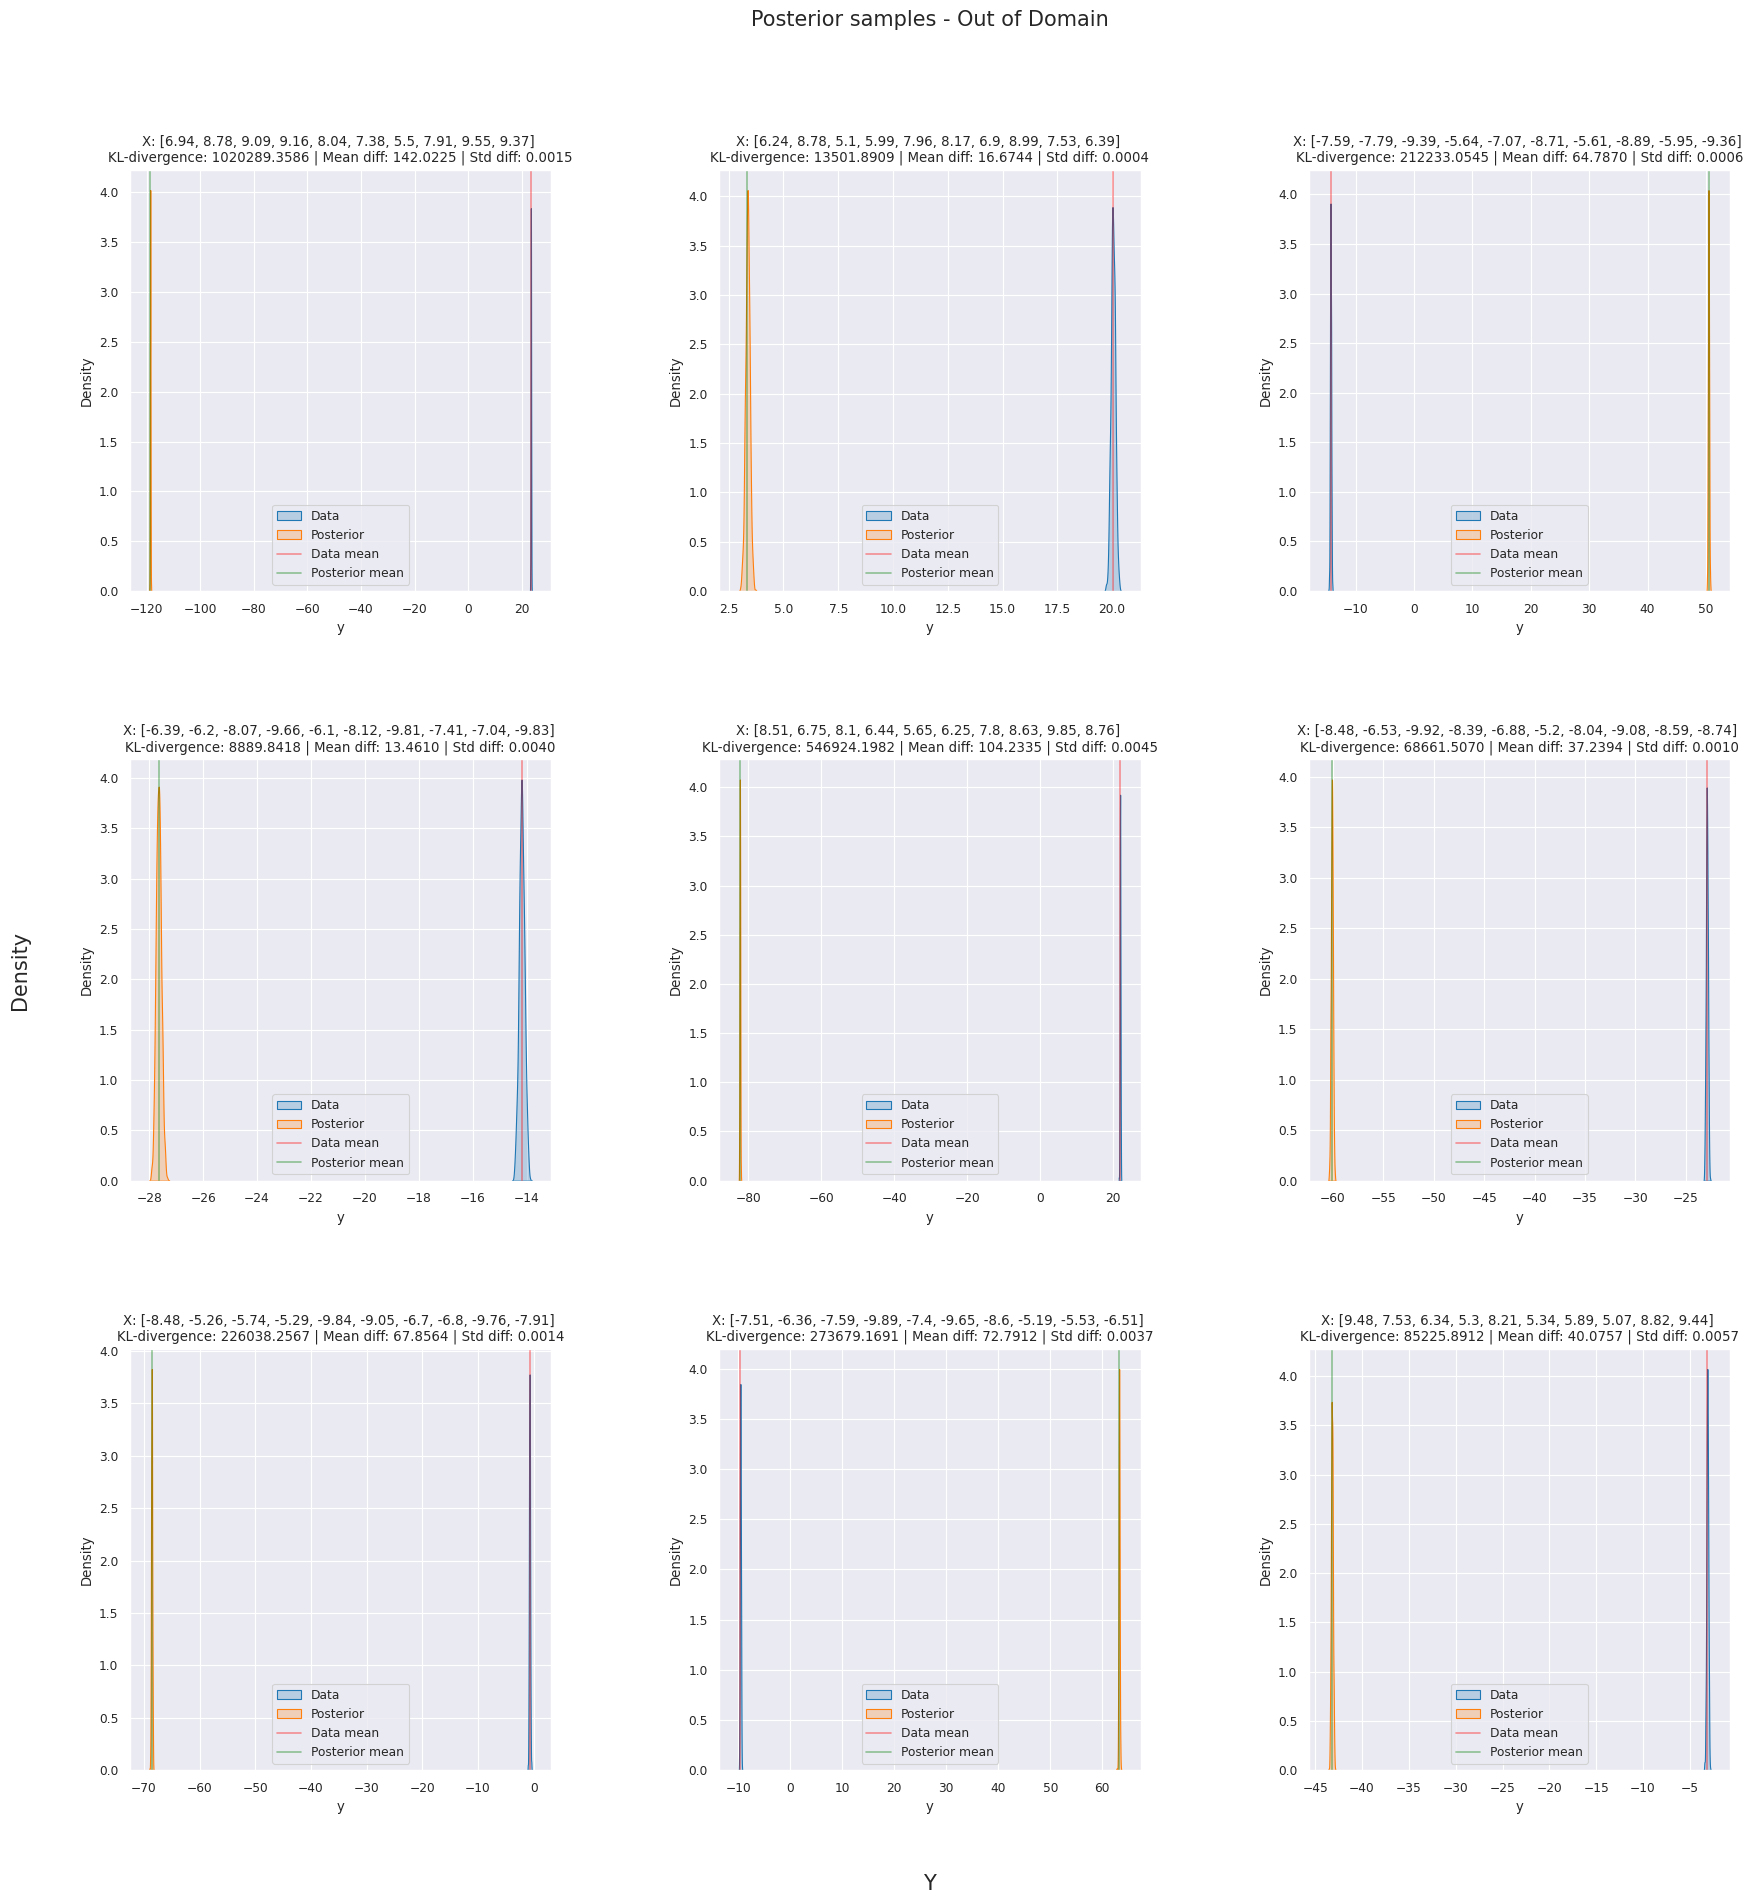

Eval done in 0:00:13.299479


In [8]:
if EVAL:
    if not os.path.exists(f"{BASE_DIR}/results"):
                os.mkdir(f"{BASE_DIR}/results")
                
    eval1.eval(config, dataset_config, f"{BASE_DIR}", bnn=bnn)